<a href="https://colab.research.google.com/github/Carol-Coutinho/OU3/blob/main/AVS05_OU3_Caroline_Coutinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AVS_05_OU3

Caroline Coutinho

A partir de uma mistura equimolar dos componentes da sua AVS01, responder as seguintes questões:



- Qual a concentração do componente mais leve no refervedor quando a fração destilada corresponder a 60% (em base molar)?


- Qual a concentração do componente mais pesado no destilado de topo, quando a fração restante de mistura no refervedor for de 40%?

Mistura escolhida: Tolueno e Benzeno

Primeiro vamos preparar o Kernel:

In [ ]:
# Preparando kernel
import pandas as pd
#import pickle
!pip3 install pickle5
import pickle5 as pickl
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
# Para ler/carregar
with open('/content/databank_properties.pickle', 'rb') as handle:
    dados, all_units = pickl.load(handle)

In [ ]:
# Carregamento das funções úteis
from OU3_funcoes_uteis_v01 import *

Buscando os componentes necessários: Tolueno e Benzeno.


In [ ]:
# Buscando o primeiro componente:
filtro1 = dados.name.str.contains('BENZENE')
dados[filtro1]


,num,name,molar_mass,fusion_point,boiling_point,critical_temp,critical_pressure,critical_volume,zc,acentric_factor,liq_density,temp_ref_liq_density,dipole_moment,cp_a,cp_b,cp_c,cp_d,visc_b,visc_c,delta_h0f_gas,delta_g0f_gas,pvap_a,pvap_b,pvap_c,temp_max_pvap,temp_min_pvap,pvap_h_a,pvap_h_b,pvap_h_c,pvap_h_d,delta_h_vap_bp
14,383,"1,2,3-TRIMETHYLBENZENE",120.195,247.7,449.2,664.5,34.1,430.0,0.270,0.390,0.894,293.0,0.6,-1.658000,0.151300,-0.000079,1.579000e-08,NaN,NaN,-2.29,29.77,16.2121,3670.22,-66.07,479.00,329.0,NaN,NaN,NaN,NaN,9570.0
16,384,"1,2,4-TRIMETHYLBENZENE",120.195,227.0,442.5,649.1,31.9,430.0,0.258,0.390,0.880,289.0,0.3,-1.115000,0.149000,-0.000078,1.523000e-08,872.74,297.75,-3.33,27.95,16.2190,3622.58,-64.59,471.00,324.0,56.241,-7256.56,-5.459,7.270,9380.0
24,385,"1,3,5-TRIMETHYLBENZENE",120.195,228.4,437.9,637.3,30.9,433.0,0.260,0.398,0.865,293.0,0.1,-4.679000,0.160600,-0.000088,1.839000e-08,437.52,268.27,3.84,28.19,16.2893,3614.19,-63.57,466.00,321.0,58.041,-7326.78,-5.706,7.220,9330.0
28,407,"1,4-DIETHYLBENZENE",134.222,231.0,456.9,657.9,27.7,480.0,0.250,0.403,0.862,293.0,0.1,-8.937000,0.207100,-0.000133,3.370000e-08,NaN,NaN,-5.32,32.95,16.1140,3657.22,-71.18,487.00,335.0,NaN,NaN,NaN,NaN,9410.0
45,380,1-METHYL-2-ETHYLBENZENE,120.195,192.3,438.3,651.0,30.0,460.0,0.260,0.294,0.881,293.0,0.0,-3.928000,0.167100,-0.000098,2.228000e-08,NaN,NaN,0.29,31.33,16.1253,3535.33,-65.85,467.00,321.0,64.337,-7662.94,-6.617,7.180,9290.0
46,404,1-METHYL-2-ISOPROPYLBENZENE,134.222,NaN,451.5,670.0,28.6,NaN,NaN,0.277,0.876,293.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,15.9809,3564.52,-70.00,481.00,330.0,NaN,NaN,NaN,NaN,0.0
47,405,1-METHYL-2-ISOPROPYLBENZENE,134.222,NaN,448.3,666.0,29.0,NaN,NaN,0.279,0.861,293.0,0.0,-11.646000,0.216500,-0.000145,3.887000e-08,NaN,NaN,-7.00,0.00,15.9811,3543.79,-69.22,478.00,328.0,67.726,-8033.58,-7.076,8.390,9110.0
48,381,1-METHYL-3-ETHYLBENZENE,120.195,177.6,434.5,637.0,28.0,490.0,0.260,0.360,0.865,293.0,0.0,-6.926000,0.174200,-0.000104,2.388000e+00,8.00,0.00,0.00,-0.46,30.2200,16.15,3521.08,-64.64,463.0,318.000,65.67,-7678.110,-6.815,7.2
49,382,1-METHYL-4-ETHYLBENZENE,120.195,210.8,435.2,640.0,29.0,470.0,0.260,0.322,0.861,293.0,0.0,-6.523000,0.171400,-0.000101,2.279000e-08,463.17,266.08,-0.49,30.28,16.1135,3516.31,-64.23,463.00,318.0,61.404,-7422.59,-6.212,7.230,9180.0
50,406,1-METHYL-4-ISOPROPYLBENZENE,134.222,200.0,450.3,653.0,27.9,NaN,NaN,0.371,0.857,293.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,15.9424,3539.21,-70.10,480.00,329.0,63.225,-7800.97,-6.432,8.410,0.0


In [ ]:
# Buscando o segundo componente: 
filtro2 = dados.name.str.contains('TOLUENE')
dados[filtro2]

,num,name,molar_mass,fusion_point,boiling_point,critical_temp,critical_pressure,critical_volume,zc,acentric_factor,liq_density,temp_ref_liq_density,dipole_moment,cp_a,cp_b,cp_c,cp_d,visc_b,visc_c,delta_h0f_gas,delta_g0f_gas,pvap_a,pvap_b,pvap_c,temp_max_pvap,temp_min_pvap,pvap_h_a,pvap_h_b,pvap_h_c,pvap_h_d,delta_h_vap_bp
440,286,TOLUENE,92.141,178.0,383.8,591.7,40.6,316.0,0.264,0.257,0.867,293.0,0.4,-5.817,0.1224,-0.000066,1.173000e-08,467.33,255.24,11.95,29.16,16.0137,3096.52,-53.67,410.0,280.0,56.785,-6283.5,-5.681,4.84,7930.0


Logo, pela pesquisa, sabemos que o número dos componentes desejados no banco de dados são 242 e 286.


In [ ]:
# O comprimento da lista será o número de componentes
lista_componentes = [ 242, 286]
nc = len(lista_componentes)
nc

2

In [ ]:
# Encontrando as temperaturas de ebulição dos dois componenetes: 
T_eb_comp = dados[dados['num'].isin(lista_componentes)]['boiling_point']
T_eb_comp = T_eb_comp.tolist()
T_eb_comp

[353.3, 383.8]

In [ ]:
# Declarando a composição e as condições dadas:

z = [0.5,0.5]
FD = 0.6
FR = 0.4


De acordo com o material de referência (OU3_texto05_v01_Dest_Batelada) o primeiro passo é calcular o alfa médio.
O alfa médio será calculado através da equação a seguir (1) para uma faixa de temperatura entre os pontos de ebulição dos componenetrs.

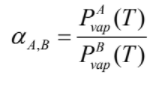

Iremos calcular as pressões de vapor através da equação de Antoine.

In [ ]:
# Faixa de temperatura:
T_ant = np.linspace(T_eb_comp[0],T_eb_comp[1],20)
T_ant

array([353.3       , 354.90526316, 356.51052632, 358.11578947,
       359.72105263, 361.32631579, 362.93157895, 364.53684211,
       366.14210526, 367.74736842, 369.35263158, 370.95789474,
       372.56315789, 374.16842105, 375.77368421, 377.37894737,
       378.98421053, 380.58947368, 382.19473684, 383.8       ])

In [ ]:
# Calculando as pressões de vapor para o hexano:
P_vap_hex = f_Pvap_Antoine_db(T_ant,lista_componentes[0],dados)
P_vap_hex = np.array(P_vap_hex[0])
P_vap_hex

array([ 761.1269264 ,  799.48217883,  839.3345605 ,  880.72351513,
        923.68889256,  968.27093797, 1014.51028083, 1062.44792377,
       1112.12523129, 1163.58391828, 1216.86603851, 1272.0139729 ,
       1329.07041783, 1388.0783732 , 1449.08113055, 1512.12226101,
       1577.24560327, 1644.49525141, 1713.91554282, 1785.55104594])

In [ ]:
# Calculando as pressões de vapor para o tolueno:
P_vap_tol = f_Pvap_Antoine_db(T_ant,lista_componentes[1],dados)
P_vap_tol = np.array(P_vap_tol[0])
P_vap_tol


array([292.72125527, 309.29409177, 326.6144782 , 344.70667583,
       363.5953638 , 383.3056357 , 403.86299589, 425.2933556 ,
       447.62302877, 470.87872777, 495.0875588 , 520.27701715,
       546.47498224, 573.70971245, 602.00983982, 631.40436448,
       661.92264897, 693.5944124 , 726.44972439, 760.5189989 ])

In [ ]:
# Cálculo do alfa através da equação 1:
alfa = P_vap_hex/P_vap_tol
alfa

array([2.60017649, 2.58486082, 2.56980206, 2.55499408, 2.54043089,
       2.52610671, 2.51201593, 2.49815312, 2.48451299, 2.47109043,
       2.45788046, 2.44487827, 2.43207916, 2.4194786 , 2.40707217,
       2.39485557, 2.38282465, 2.37097535, 2.35930373, 2.34780597])

In [ ]:
# Calculo do alfa médio:

alfa_medio = (alfa[0]+alfa[-1])/2
alfa_medio 

2.4739912305625036

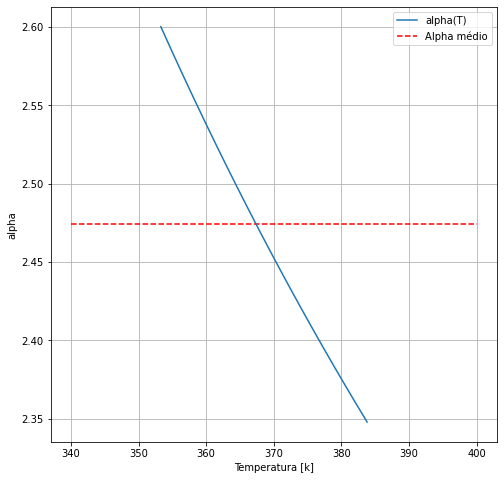

In [ ]:
# Plotando o gráfico para determinar o alfa médio:

fig1, ax1 = plt.subplots(figsize =(8,8))
ax1.plot(T_ant,alfa,label='alpha(T)')
# Adicionando texto nos eixos - descrição
ax1.set_xlabel('Temperatura [k]')
ax1.set_ylabel('alpha')
ax1.hlines(alfa_medio,340,400, colors='r', linestyles='dashed', label = 'Alpha médio')
ax1.grid()
ax1.legend()

De posse do alfa médio (2.47), podemos lançar mão da equação 38 do material para estimar a fração molar de hexano residual no refervedor.

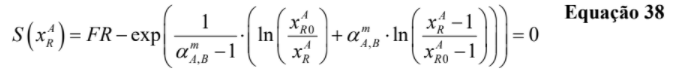

Sabemos que:

$$x_{R0}^A = 0.5$$
$$FR = 0.4 $$

In [ ]:
#alfa_teste = 2.45
#xr0_t = 0.5
#xr_t = 0.1
#FR_teste = np.exp( (1/(alfa_teste - 1)) * (np.log(xr_t/xr0_t) + alfa_teste*np.log((xr0_t-1)/(xr_t-1))))
#FR_teste

0.12207569697915056

In [ ]:
# Definindo a função:

def refervedor(xr,alfa_medio,FR,xr0):
  a = -FR + (np.exp((1/(alfa_medio - 1))*( np.log(xr/xr_0) + alfa_medio*np.log((xr_0 - 1)/(xr - 1)))))
  return a

In [ ]:
from scipy.optimize import fsolve

In [ ]:
chute_xr = 0.3
xr_0 = z[0]

In [ ]:
xa_R = fsolve(refervedor, chute_xr, args=(alfa_medio, FR, xr_0))
xa_R*100

array([29.89303361])

Logo, quando 60% da fração estiver destilada, cerca de 30% do componente mais leve (hexano) estará residual no refervedor. 

Agora iremos calcular a concentração do componente mais pesado no destilado quando a fração restante da mistura no refervedor for de 40%.

Para isso, iremos considerar as equações abaixo:

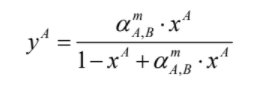

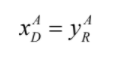

In [ ]:
ya_R = (alfa_medio*xa_R)/(1 - xa_R + alfa_medio*xa_R)
ya_R

array([0.51335583])

In [ ]:
xa_D = ya_R
xa_D

array([0.51335583])

In [ ]:
xb_D = 1 - xa_D
xb_D

array([0.48664417])

Logo, a concentração do componente mais pesado (tolueno) no destilado quando a fração restante no refervedor for de 40%, será de cerca de 48%. 